In [574]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from scipy.stats import ttest_ind
from itertools import combinations
from scipy.stats import f_oneway
from category_encoders import TargetEncoder
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [391]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [392]:
keras.__version__

'2.12.0'

In [393]:
test_set= pd.read_csv("test_set.csv")
training_set= pd.read_csv("training_set.csv")

In [394]:
test_set.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [395]:
test_set.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [396]:
training_set.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [397]:
training_set.shape

(8523, 12)

In [398]:
test_set.shape

(5681, 11)

In [399]:
s1= set(training_set["Item_Weight"].unique())
s2= set(test_set["Item_Weight"].unique())

In [400]:
len(s1), len(s2)

(416, 411)

In [401]:
s3= s1.intersection(s2)
len(s3)

410

In [402]:
training_set["Set"]= "training"
test_set["Set"]= "test"

In [403]:
# To concatenate the training and test set, I need to reindex the rows of the test set. 
new_indices_for_test_set = range(8523, 14204)
test_set = test_set.set_index(pd.Index(new_indices_for_test_set))

In [404]:
df = pd.concat([training_set,test_set])

In [405]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [406]:
'''Note that the item identifier is unique to each product. There are products repeated in different outlets
and this is why multiple rows with the same item identifier. I know this because I have seen this dataset
earlier.'''

'Note that the item identifier is unique to each product. There are products repeated in different outlets\nand this is why multiple rows with the same item identifier. I know this because I have seen this dataset\nearlier.'

In [407]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Set                             0
dtype: int64

In [408]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
Set                           object
dtype: object

**Continuous variables**

In [409]:
continuous_var = ["Item_Weight", "Item_Visibility", "Item_MRP"]

In [410]:
df[continuous_var].describe()

,Item_Weight,Item_Visibility,Item_MRP
count,11765.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977
std,4.652502,0.051459,62.086938
min,4.555000,0.000000,31.290000
25%,8.710000,0.027036,94.012000
50%,12.600000,0.054021,142.247000
75%,16.750000,0.094037,185.855600
max,21.350000,0.328391,266.888400


In [411]:
def hist_and_kde(df, column_name):
    assert column_name in df.columns, f'{column_name} not found in DataFrame columns'
    fig, ax = plt.subplots()
    sns.histplot(df[column_name], bins=80, kde= True, ax=ax)

In [412]:
# Draft
'''
fig, ax = plt.subplots()
sns.histplot(df[column_name], bins=80, kde= True, ax=ax) # Set kde=False to exclude the KDE curve from the histogram
# Plot KDE on top of the histogram
sns.kdeplot(df[column_name], color='red', ax=ax)
ax.set_xlabel(column_name)
ax.set_ylabel('Frequency')
ax.set_title(f'Histogram with KDE of {column_name}')
plt.show()
'''

"\nfig, ax = plt.subplots()\nsns.histplot(df[column_name], bins=80, kde= True, ax=ax) # Set kde=False to exclude the KDE curve from the histogram\n# Plot KDE on top of the histogram\nsns.kdeplot(df[column_name], color='red', ax=ax)\nax.set_xlabel(column_name)\nax.set_ylabel('Frequency')\nax.set_title(f'Histogram with KDE of {column_name}')\nplt.show()\n"

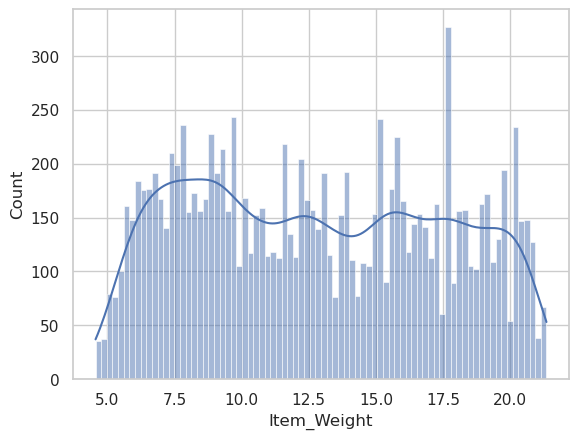

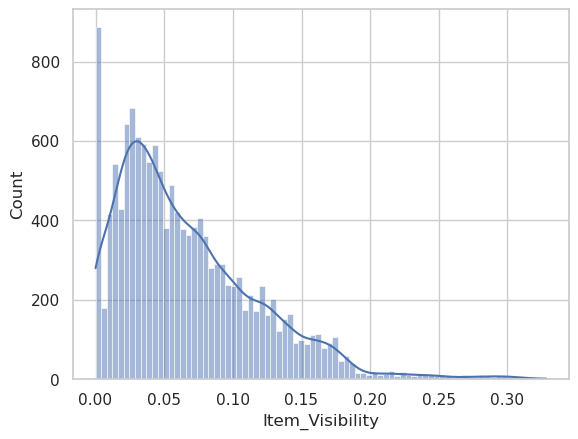

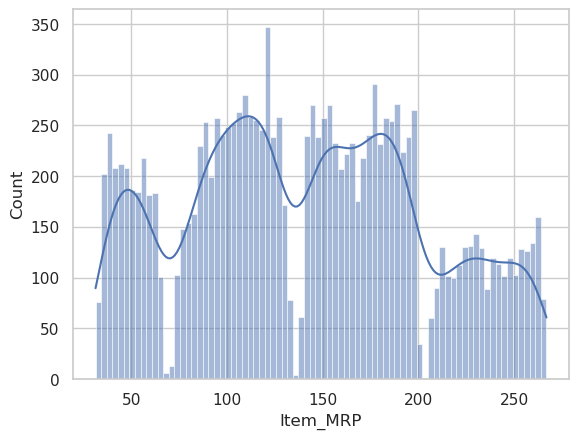

In [413]:
for col in continuous_var:
    hist_and_kde(df, col)

In [414]:
df["Item_Visibility"].skew()

1.1951751774587882

In [415]:
print("mean = ", df["Item_Visibility"].mean(), "\n", 
      "median = ", df["Item_Visibility"].median(),"\n",
      "mode = ", df["Item_Visibility"].mode()[0])

mean =  0.06595278007399324 
 median =  0.054020536499999994 
 mode =  0.0


In [416]:
def box_plot_one_var(df, column_name):
    plt.boxplot(df[column_name])
    plt.title(column_name)
    plt.show()

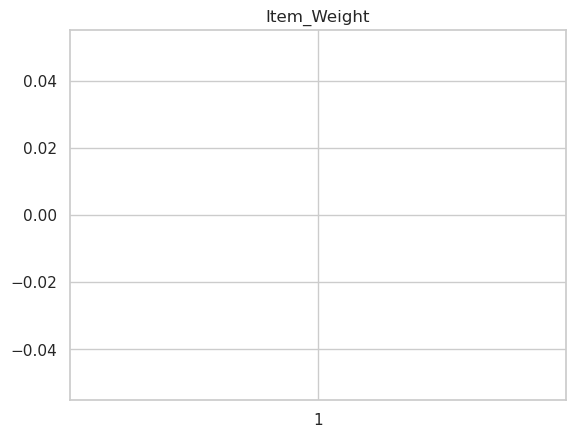

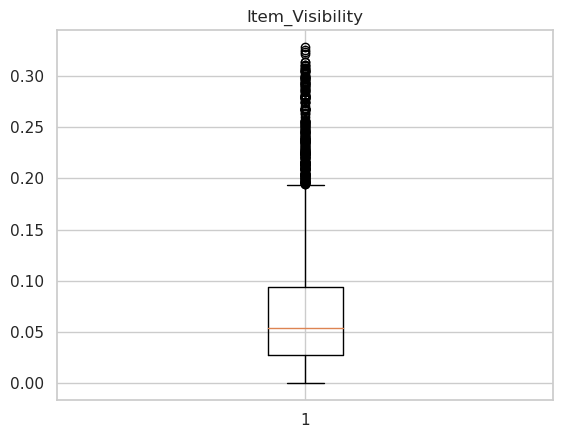

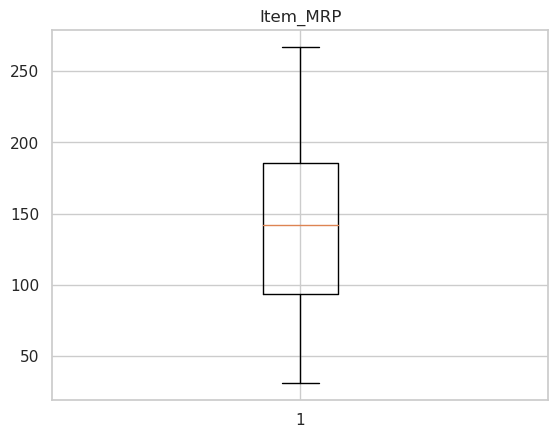

In [417]:
for col_name in continuous_var:
    box_plot_one_var(df,col_name)

I think boxplot doesn't show a plot if there are missing values. This is why the plot for the items 
weights is missing. However, there are no outliers in non of the continuous features.

**The target variable: Item_Outlet_Sales**

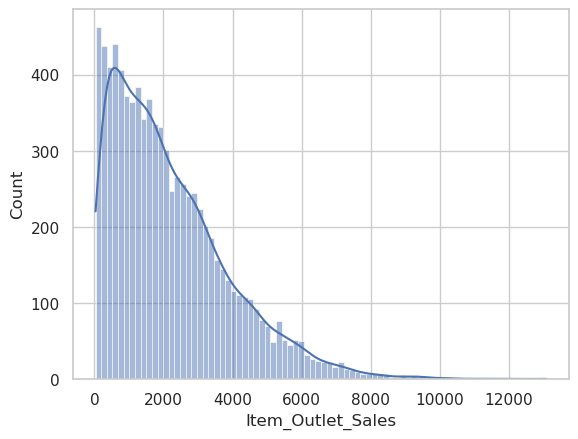

In [418]:
# Let us check the distribution of the target variable
hist_and_kde(training_set, "Item_Outlet_Sales")

**Ordinal columns and categorical columns with few categories: <br/>
Item_Fat_Content and Outlet_Location_Type: label encoding <br/>
Outlet_Type: one-hot-encoding.**

In [419]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [420]:
df["Item_Fat_Content"].replace(['low fat', 'LF'], 'Low Fat', inplace=True)
df["Item_Fat_Content"].replace('reg', 'Regular', inplace=True)

In [421]:
df[df["Item_Fat_Content"]== 'Low Fat'].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,training


In [422]:
df[df["Item_Fat_Content"]== 'Regular'].head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training


In [423]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [424]:
label_encoder = preprocessing.LabelEncoder()  
df["Item_Fat_Content"]= label_encoder.fit_transform(df["Item_Fat_Content"])  
df["Item_Fat_Content"].unique() 

array([0, 1])

In [425]:
df.iloc[1]["Item_Fat_Content"]

1

Low Fat was mapped to 0 and Regular to 1. 

In [426]:
df["Outlet_Size"].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [427]:
missing_size_outlets = df[df['Outlet_Size'].isnull()] # returns a dataframe
missing_outlet_identifiers = missing_size_outlets['Outlet_Identifier'].unique()
print(missing_outlet_identifiers)

['OUT010' 'OUT045' 'OUT017']


In [428]:
# If Outlet_Size is missing => Outlet_Identifier has to be in ['OUT010' 'OUT045' 'OUT017'].
# How about the other way around?

In [429]:
# Are there known Outlet_Size for each of 'OUT010' 'OUT045' 'OUT017' ???
for outlet_identifier in missing_outlet_identifiers:
    all_null_outlet_size = df[df['Outlet_Identifier'] == outlet_identifier]['Outlet_Size'].isnull().all()
    print(outlet_identifier, all_null_outlet_size)

OUT010 True
OUT045 True
OUT017 True


We conclude that the outlet sizes of the outliers 'OUT010' 'OUT045' 'OUT017' are missing. 

In [430]:
df["Outlet_Location_Type"].unique() # is it ordinal? let us assume so.

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [431]:
label_encoder = preprocessing.LabelEncoder()  
df["Outlet_Location_Type"]= label_encoder.fit_transform(df["Outlet_Location_Type"])  
df["Outlet_Location_Type"].unique() 
# Tier 1 becomes 0, Tier 3 becomes 2, Tier 2 becomes 1.

array([0, 2, 1])

In [432]:
df["Outlet_Location_Type"].unique()

array([0, 2, 1])

In [433]:
df["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [434]:
df = pd.get_dummies(df, columns=['Outlet_Type'], prefix='Outlet_Type')

In [435]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,3735.1380,training,False,True,False,False
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,2,443.4228,training,False,False,True,False
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,0,2097.2700,training,False,True,False,False
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,732.3800,training,True,False,False,False
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,2,994.7052,training,False,True,False,False


In [436]:
df["Outlet_Type_Grocery Store"]= df["Outlet_Type_Grocery Store"].astype(int)
df["Outlet_Type_Supermarket Type1"]= df["Outlet_Type_Supermarket Type1"].astype(int)
df["Outlet_Type_Supermarket Type2"]= df["Outlet_Type_Supermarket Type2"].astype(int)
df["Outlet_Type_Supermarket Type3"]= df["Outlet_Type_Supermarket Type3"].astype(int)

In [437]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,3735.1380,training,0,1,0,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,2,443.4228,training,0,0,1,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,0,2097.2700,training,0,1,0,0
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,2,732.3800,training,1,0,0,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,High,2,994.7052,training,0,1,0,0


**Categorical features with so many categories: Item_Identifer, Outlet_Identifier and
Item_Type**

**Testing some hypotheses:**

In [438]:
print(df["Item_Type"].unique())
print(df["Item_Type"].nunique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
16


In [439]:
# Let us first investigate if the sales differ between these groups

In [440]:
df["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [441]:
def box_plots(df, x_feature, y_feature, figsize_x, figsize_y, without_outliers=False):
    plt.figure(figsize=(figsize_x, figsize_y))
    sns.set(style="whitegrid")
    if without_outliers == True:
        sns.boxplot(x= x_feature, y= y_feature, data= df, sym="")
    else:
        sns.boxplot(x= x_feature, y= y_feature, data= df)
    plt.xticks(rotation=45, ha='right')
    plt.title("Boxplot of Item_Outlet_Sales for each Item_Type")
    plt.title(f"Boxplot of {y_feature} for {x_feature}")
    plt.xlabel("Item_Type")
    plt.ylabel("Item_Outlet_Sales")
    plt.show()

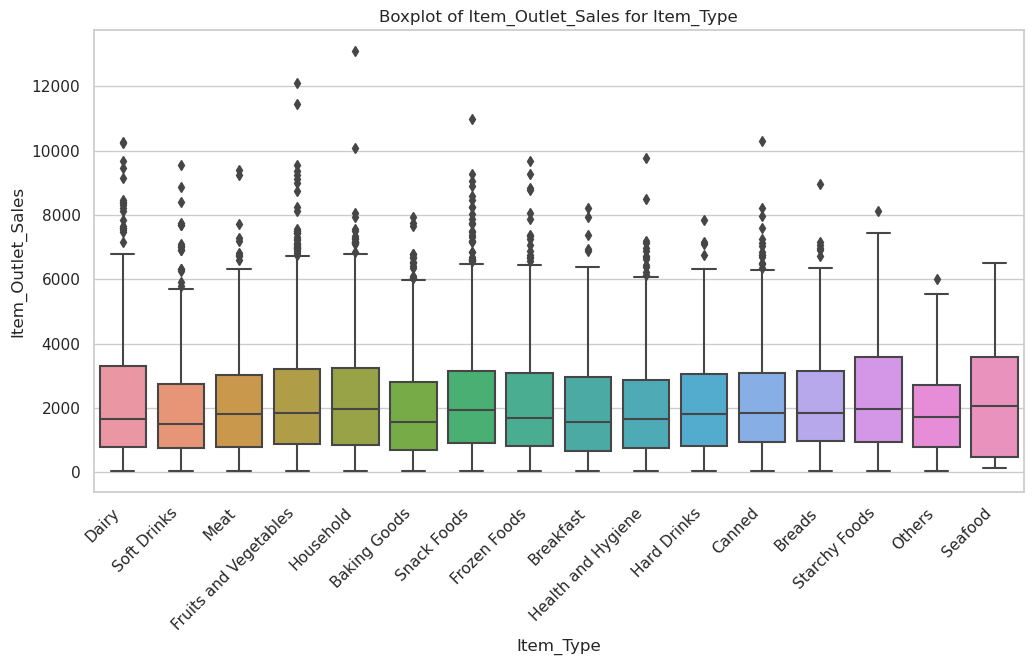

In [442]:
box_plots(training_set, "Item_Type", "Item_Outlet_Sales", figsize_x= 12, figsize_y=6)

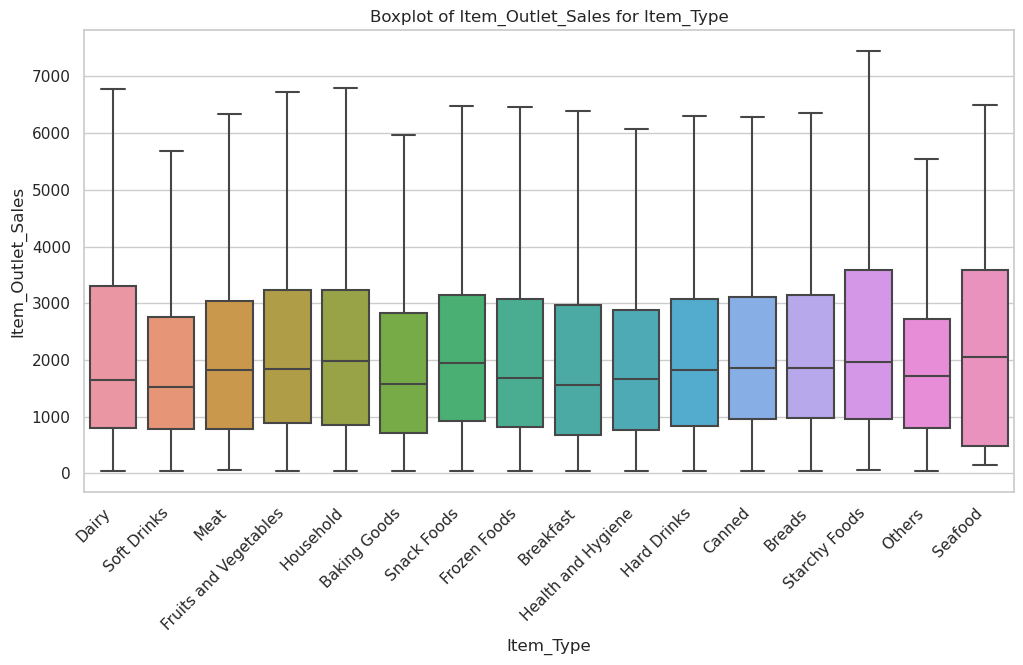

In [443]:
box_plots(training_set, "Item_Type", "Item_Outlet_Sales", figsize_x= 12, figsize_y=6, without_outliers=True)

**t-test and anova between sales of meat and seafood**

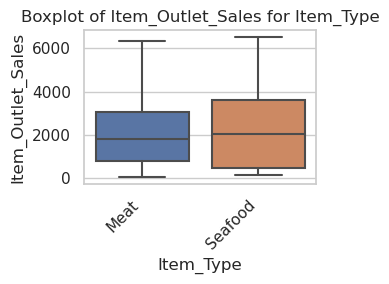

In [444]:
# Let us plot Meat against Seafood for example
selected_item_types = ['Meat', 'Seafood']
df_selected_types = training_set[training_set['Item_Type'].isin(selected_item_types)]
box_plots(df_selected_types, "Item_Type", "Item_Outlet_Sales",figsize_x= 3, figsize_y=2, without_outliers=True)

In [445]:
# let us test the null hypothesis that the price average for meat equals that of seafood.
# since we are comparing two groups only, we can use a t-test

meat_data = training_set[training_set['Item_Type'] == 'Meat']['Item_Outlet_Sales']
seafood_data = training_set[training_set['Item_Type'] == 'Seafood']['Item_Outlet_Sales']

statistic, p_value = ttest_ind(meat_data, seafood_data, equal_var=False)
print("T-statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average sales.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average sales.")


T-statistic: -0.6830801665660939
P-value: 0.49653253935334885
Fail to reject the null hypothesis: There is no significant difference in average sales.


**Thinking moment: One requirement to use anova is: The population standard deviations of the groups are all equal. This property is known as homoscedasticity. How do I know that?**

**Thinking moment: the population sales prices of meat and seafood don't follow a Gaussian distribution. How can this influence the result of the t-test or anova?**

sample distribution for sales of meat

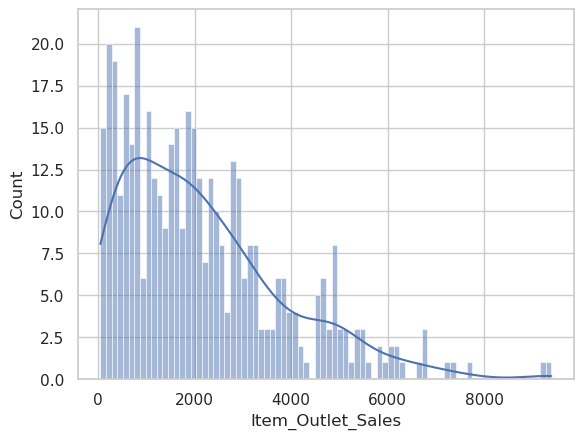

In [446]:
hist_and_kde(training_set[training_set["Item_Type"]=="Meat"], "Item_Outlet_Sales")

sample distribution for sales of seafood

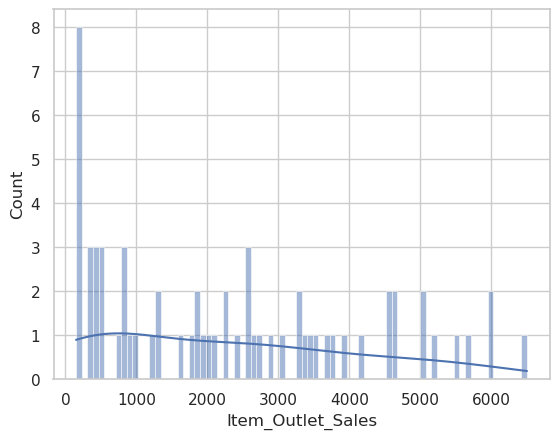

In [447]:
hist_and_kde(training_set[training_set["Item_Type"]=="Seafood"], "Item_Outlet_Sales")

In [448]:
f_statistic, p_value = f_oneway(meat_data, seafood_data)
print(f"F-statistic= {f_statistic}, P-value= {p_value}")
alpha = 0.05
if p_value < alpha: print("there is a significant difference")
else: print("there is no significant difference")

F-statistic= 0.5279474992094711, P-value= 0.46782014475291733
there is no significant difference


**Thinking moment: notice the difference in samples sizes. The seafood sample size 89 and the meat sample size is 736. Could this remarkable difference in samples' sizes affect the reliability of the t-test?**

**anova on sales of all item types**

In [449]:
item_sales_dict = {}
for item_type in training_set['Item_Type'].unique():
    item_sales_dict[item_type] = training_set[training_set['Item_Type'] == item_type]['Item_Outlet_Sales']

f_statistic, p_value = f_oneway(*item_sales_dict.values())

print("F-statistic:", f_statistic)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in item sales between item types.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in item sales between item types.")

F-statistic: 2.700653287521041
P-value: 0.00038843993766501125
Reject the null hypothesis: There is a significant difference in item sales between item types.


Conclusion: There are at least two items whose average prices are not equal.

**Pair-wise t-tests of sales with respect to item types**

In [450]:
item_types = list(training_set["Item_Type"].unique())
all_combinations = list(combinations(item_types,2))
print("All combinations of 2 elements:")
for combination in all_combinations:
    print(combination)

All combinations of 2 elements:
('Dairy', 'Soft Drinks')
('Dairy', 'Meat')
('Dairy', 'Fruits and Vegetables')
('Dairy', 'Household')
('Dairy', 'Baking Goods')
('Dairy', 'Snack Foods')
('Dairy', 'Frozen Foods')
('Dairy', 'Breakfast')
('Dairy', 'Health and Hygiene')
('Dairy', 'Hard Drinks')
('Dairy', 'Canned')
('Dairy', 'Breads')
('Dairy', 'Starchy Foods')
('Dairy', 'Others')
('Dairy', 'Seafood')
('Soft Drinks', 'Meat')
('Soft Drinks', 'Fruits and Vegetables')
('Soft Drinks', 'Household')
('Soft Drinks', 'Baking Goods')
('Soft Drinks', 'Snack Foods')
('Soft Drinks', 'Frozen Foods')
('Soft Drinks', 'Breakfast')
('Soft Drinks', 'Health and Hygiene')
('Soft Drinks', 'Hard Drinks')
('Soft Drinks', 'Canned')
('Soft Drinks', 'Breads')
('Soft Drinks', 'Starchy Foods')
('Soft Drinks', 'Others')
('Soft Drinks', 'Seafood')
('Meat', 'Fruits and Vegetables')
('Meat', 'Household')
('Meat', 'Baking Goods')
('Meat', 'Snack Foods')
('Meat', 'Frozen Foods')
('Meat', 'Breakfast')
('Meat', 'Health and Hygi

In [451]:
all_combinations[0][0]

'Dairy'

In [452]:
for combination in all_combinations:    
    data_1 = training_set[training_set['Item_Type'] == combination[0]]['Item_Outlet_Sales']
    data_2 = training_set[training_set['Item_Type'] == combination[1]]['Item_Outlet_Sales']
    statistic, p_value = ttest_ind(data_1, data_2, equal_var=False)
    alpha = 0.05
    if p_value < alpha:
        print(f"Difference between {combination[0]} and {combination[1]}: T-statistic = {statistic}, P-value = {p_value}")    

Difference between Dairy and Soft Drinks: T-statistic = 2.1072131538183076, P-value = 0.03534158548971076
Difference between Dairy and Baking Goods: T-statistic = 2.96362914276734, P-value = 0.0030956538757070788
Difference between Dairy and Health and Hygiene: T-statistic = 2.2424642596672504, P-value = 0.025114525135927084
Difference between Dairy and Others: T-statistic = 2.326968900485748, P-value = 0.0205749274468883
Difference between Soft Drinks and Fruits and Vegetables: T-statistic = -2.9898476566752037, P-value = 0.00287268209478413
Difference between Soft Drinks and Household: T-statistic = -2.5956430788362135, P-value = 0.009596943005715935
Difference between Soft Drinks and Snack Foods: T-statistic = -2.899724756648214, P-value = 0.0038362845671716965
Difference between Soft Drinks and Canned: T-statistic = -2.1371994863400285, P-value = 0.03283839935285624
Difference between Soft Drinks and Starchy Foods: T-statistic = -2.21555442433157, P-value = 0.027661076390229303
Dif

**Thinking moment:**
We notice that each of the categories Breakfast, Hard drinks, and Seafood cann't be proven to have different price average than each other item type. 
However, notice that dairy and softdrinks are different, yet 
seefood is not different than neither dairy nor softdrinks. Another example is: Dairy is different than 
softdrink, softdrink is different than fruits, yet there is no evidence that dairy and fruits are different. <br/>
The reason is that anova's results are not reliable since the size of some samples is small.

In [453]:
training_set["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [454]:
# Multivariate analysis
# Let us check for difference of prices of the same product type across different outlet location types.
def grouped_box_plot(df, cont, cat1, cat2):
    plt.figure(figsize=(20, 8))
    sns.set(style="whitegrid")
    custom_palette = sns.color_palette("Paired")
    sns.boxplot(x=cat1, y=cont, hue=cat2, data= df, orient='v', palette=custom_palette )
    plt.xticks(rotation=45)

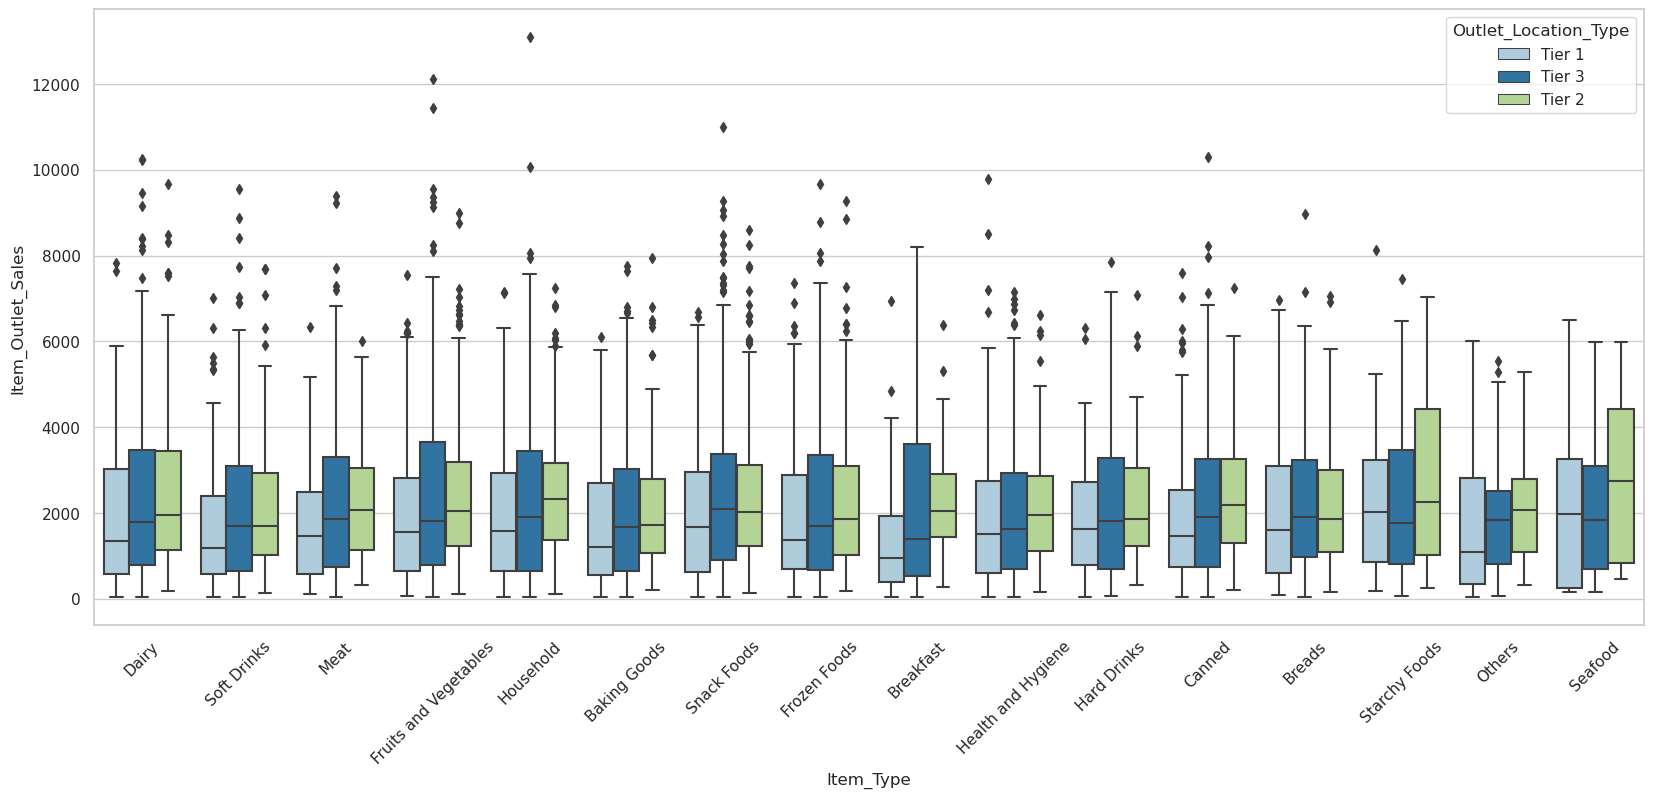

In [455]:
grouped_box_plot(training_set, "Item_Outlet_Sales", "Item_Type", "Outlet_Location_Type")

It seems from the grouped boxplots that (almost) for each item type, that sales of tier 2 are highest, followed by those of tier 3, followed by those of tier 1. For some item types, this is very obvious, like for breakfast and household items for example. For some items it is not that evident, take breads and hard drinks as examples.

In [456]:
training_set.pivot_table("Item_Outlet_Sales","Item_Type",  "Outlet_Location_Type", aggfunc="sum")

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,326773.3084,433105.5632,5.056465e+05
Breads,137308.5998,191129.2086,2.247994e+05
Breakfast,50576.8312,77356.6388,1.043655e+05
Canned,327962.4272,545605.1234,5.705839e+05
Dairy,370911.1878,525673.0688,6.260098e+05
Frozen Foods,474369.1840,629854.7896,7.215108e+05
Fruits and Vegetables,663919.1150,950565.9890,1.205575e+06
Hard Drinks,109311.7098,161648.2504,1.868335e+05
Health and Hygiene,256978.8260,347585.5506,4.406358e+05


In [457]:
training_set.pivot_table("Item_Outlet_Sales","Item_Type",  "Outlet_Location_Type", aggfunc="mean")

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Item_Type,,,
Baking Goods,1766.342208,2052.633001,2006.533613
Breads,2049.382087,2275.347721,2247.993804
Breakfast,1532.631248,2417.394963,2319.232924
Canned,1852.895069,2457.680736,2282.335768
Dairy,1809.322867,2456.416209,2380.265379
Frozen Foods,1897.476736,2257.544049,2206.455092
Fruits and Vegetables,1970.086395,2382.370900,2430.594179
Hard Drinks,1884.684652,2245.114589,2224.207940
Health and Hygiene,1862.165406,2093.888859,2039.980376


In [458]:
training_set.groupby(["Item_Type","Outlet_Location_Type"]).size()

Item_Type              Outlet_Location_Type
Baking Goods           Tier 1                  185
                       Tier 2                  211
                       Tier 3                  252
Breads                 Tier 1                   67
                       Tier 2                   84
                       Tier 3                  100
Breakfast              Tier 1                   33
                       Tier 2                   32
                       Tier 3                   45
Canned                 Tier 1                  177
                       Tier 2                  222
                       Tier 3                  250
Dairy                  Tier 1                  205
                       Tier 2                  214
                       Tier 3                  263
Frozen Foods           Tier 1                  250
                       Tier 2                  279
                       Tier 3                  327
Fruits and Vegetables  Tier 1         

**For each item type whether there is a significant difference between the averages of its sales across the three different outlet locations (tiers).** 

In [459]:
training_set["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

remember that the training_set is untouched and has original coding.

In [460]:
training_set["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [461]:
dict_sales_across_tiers = {}
for item_type in training_set['Item_Type'].unique():
    tier_1 = training_set[(training_set['Item_Type'] == item_type)&(training_set["Outlet_Location_Type"]=="Tier 1")]['Item_Outlet_Sales'].values
    tier_2 = training_set[(training_set['Item_Type'] == item_type)&(training_set["Outlet_Location_Type"]== 'Tier 2')]['Item_Outlet_Sales'].values
    tier_3 = training_set[(training_set['Item_Type'] == item_type)&(training_set["Outlet_Location_Type"]== 'Tier 3')]['Item_Outlet_Sales'].values
    tiers_dict={}
    tiers_dict["tier 1"]= tier_1
    tiers_dict["tier 2"]= tier_2
    tiers_dict["tier 3"]= tier_3
    dict_sales_across_tiers[item_type]= tiers_dict

In [462]:
f_statistics=[]
p_values=[]
results=[]

for item_type in training_set['Item_Type'].unique():
    f_statistic, p_value = f_oneway(*dict_sales_across_tiers[item_type].values())
    alpha = 0.05
    if p_value < alpha: res="significant difference"
    else: res= "no significant difference"
    f_statistics.append(f_statistic)
    p_values.append(p_value)
    results.append(res)    

In [463]:
dict_sales_across_tiers["Dairy"].values() # this is a dict_values type

dict_values([array([3735.138 , 2187.153 , 3435.528 ,  780.3176,  690.4346,  699.09  ,
        153.134 ,  306.268 , 3163.8816,  182.4292, 5715.2272,  916.1408,
        372.848 , 1929.4884, 1787.673 ,   75.2354, 3299.7048,  633.8416,
        334.2316, 3848.324 , 5736.5328, 1308.297 , 1593.9252,  585.904 ,
       7833.8028,  669.129 , 1470.0864,  978.726 ,  452.744 ,  527.3136,
       1323.6104, 3582.004 , 2463.46  , 1647.855 , 3078.6592,  107.8596,
       7646.0472,  236.359 , 1229.0668,  483.3708, 4950.8888, 3511.4292,
       1537.998 , 1537.998 , 3261.7542, 2396.88  , 3605.307 ,  480.7076,
       1076.5986,  498.0184, 1768.3648, 1108.557 ,  986.7156, 2345.6134,
       2797.6916, 1701.7848, 1860.2452, 3139.9128, 1494.0552,  243.6828,
        250.3408,  697.0926, 3068.0064,  351.5424, 1569.9564, 4578.0408,
       3709.8376,  607.2096, 2034.019 , 3901.588 , 1917.504 , 3179.8608,
        288.9572, 3068.0064, 1038.648 , 4781.7756, 2281.6966, 1895.5326,
       5053.422 ,  671.1264, 1464.76  

In [464]:
hypothesis_testing_results= pd.DataFrame({"Product type": training_set['Item_Type'].unique(), 
                                         "f_statistic": f_statistics, "p_value":p_values, "test_result":results})
print(hypothesis_testing_results)

             Product type  f_statistic   p_value                test_result
0                   Dairy     7.634447  0.000526     significant difference
1             Soft Drinks     4.774430  0.008883     significant difference
2                    Meat     5.890758  0.002997     significant difference
3   Fruits and Vegetables     7.441896  0.000613     significant difference
4               Household     5.274252  0.005280     significant difference
5            Baking Goods     1.941293  0.144356  no significant difference
6             Snack Foods     8.797492  0.000161     significant difference
7            Frozen Foods     3.373372  0.034732     significant difference
8               Breakfast     2.237937  0.111649  no significant difference
9      Health and Hygiene     0.906623  0.404527  no significant difference
10            Hard Drinks     1.002373  0.368748  no significant difference
11                 Canned     7.027405  0.000957     significant difference
12          

In [465]:
tier_1_sizes=[]
tier_2_sizes=[]
tier_3_sizes=[]
for item_type in training_set["Item_Type"].unique():
        tier_1_sizes.append(dict_sales_across_tiers[item_type]["tier 1"].size)
        tier_2_sizes.append(dict_sales_across_tiers[item_type]["tier 2"].size)  
        tier_3_sizes.append(dict_sales_across_tiers[item_type]["tier 3"].size)                           

In [466]:
tiers_sizes = pd.DataFrame({"Product type": training_set['Item_Type'].unique(), "tier 1 sample size": tier_1_sizes,
                           "tier 2 sample size": tier_2_sizes, "tier 3 sample size": tier_3_sizes })

In [467]:
merged_df = pd.merge(hypothesis_testing_results, tiers_sizes, on='Product type') 
merged_df

,Product type,f_statistic,p_value,test_result,tier 1 sample size,tier 2 sample size,tier 3 sample size
0,Dairy,7.634447,0.000526,significant difference,205,214,263
1,Soft Drinks,4.774430,0.008883,significant difference,120,157,168
2,Meat,5.890758,0.002997,significant difference,123,125,177
3,Fruits and Vegetables,7.441896,0.000613,significant difference,337,399,496
4,Household,5.274252,0.005280,significant difference,250,296,364
5,Baking Goods,1.941293,0.144356,no significant difference,185,211,252
6,Snack Foods,8.797492,0.000161,significant difference,334,401,465
7,Frozen Foods,3.373372,0.034732,significant difference,250,279,327
8,Breakfast,2.237937,0.111649,no significant difference,33,32,45
9,Health and Hygiene,0.906623,0.404527,no significant difference,138,166,216


**about the dataset**

In [468]:
training_set[(training_set["Item_Type"] == 'Breakfast')&(training_set["Outlet_Location_Type"]=="Tier 1")].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Set
15,FDP49,9.00,Regular,0.069089,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192,training
17,FDP49,9.00,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982,training
567,FDL25,6.92,Regular,0.131128,Breakfast,93.1804,OUT049,1999,Medium,Tier 1,Supermarket Type1,1561.9668,training
920,FDO49,NaN,Regular,0.057870,Breakfast,49.7008,OUT019,1985,Small,Tier 1,Grocery Store,50.6008,training
1069,FDQ37,20.75,Low Fat,0.089261,Breakfast,193.4478,OUT046,1997,Small,Tier 1,Supermarket Type1,4843.6950,training


There might be different outlets which have the same outlet type and are in the same tier. Look at item FDP49, it is sold in two different outlets OUT046 and OUT049 which are both tier 1 and both are supermarket type 1. 

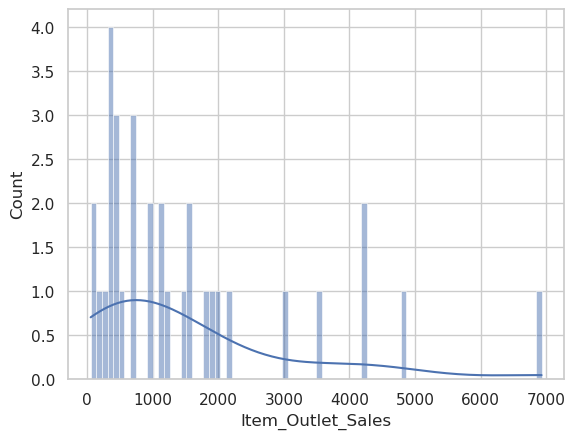

In [469]:
hist_and_kde(training_set[(training_set["Item_Type"]=="Breakfast")&(training_set["Outlet_Location_Type"]=="Tier 1")], "Item_Outlet_Sales")

**How to encode Item_Identifier, Item_Type, and Outlet_Identifier?**

In [470]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [471]:
df["Item_Identifier"].nunique()

1559

In [472]:
training_set["Item_Identifier"].nunique()

1559

In [473]:
test_set["Item_Identifier"].nunique()

1543

important observation: in the test set there are no new item identifiers

In [474]:
set(test_set["Item_Identifier"].unique())- set(training_set["Item_Identifier"].unique())

set()

In [475]:
df["Item_Identifier"].value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

In [476]:
training_set["Item_Identifier"].value_counts() # this is a series.

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

In [477]:
test_set["Item_Identifier"].value_counts()

Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64

In [478]:
training_set[training_set["Item_Identifier"]=="DRF48"]["Item_Outlet_Sales"].mean()

1496.7184

**About the dataset: The information about each outlet is redundant. The establishment year, size, location type, and outlet type don't change for the same outlet.**

In [479]:
outlets= df["Outlet_Identifier"].unique()
outlets

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [480]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Outlet_Sales', 'Set', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [481]:
#outlet_id= "OUT049"
cols= ["Outlet_Establishment_Year", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type_Supermarket Type1",
     'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3', 'Outlet_Type_Grocery Store' ]

In [482]:
outlets_dict =dict.fromkeys(outlets)

In [483]:
for key in outlets:
    temp = []
    for col in cols:
        temp.append(df[df["Outlet_Identifier"]== key].iloc[0][col])
    outlets_dict[key] = temp    

In [484]:
outlets_dict

{'OUT049': [1999, 'Medium', 0, 1, 0, 0, 0],
 'OUT018': [2009, 'Medium', 2, 0, 1, 0, 0],
 'OUT010': [1998, nan, 2, 0, 0, 0, 1],
 'OUT013': [1987, 'High', 2, 1, 0, 0, 0],
 'OUT027': [1985, 'Medium', 2, 0, 0, 1, 0],
 'OUT045': [2002, nan, 1, 1, 0, 0, 0],
 'OUT017': [2007, nan, 1, 1, 0, 0, 0],
 'OUT046': [1997, 'Small', 0, 1, 0, 0, 0],
 'OUT035': [2004, 'Small', 1, 1, 0, 0, 0],
 'OUT019': [1985, 'Small', 0, 0, 0, 0, 1]}

In [485]:
for outlet_id in outlets:
    for col, value  in zip(cols, outlets_dict[outlet_id]):
        df[(df["Outlet_Identifier"]== outlet_id)&(df[col]!= value)]

**Meeting 9: idea: For each outlet, the establishment year, size, location type, and outlet type don't change. Can we do with the outlet identifier only? and remove the establishment year, size, location type, and outlet type since they don't add any information once the outlet_identifier is known**

**Meeting 10: Can I actually train a model only on "Item_Identifier" and "Outlet_Identifier" as features?**

**Meeting 1: Thinking moment: Should we keep the Item_Identifier column? Does it not cause leakage?** <br/>
Let us check if the sales of the same item differ very much across different outlets and location types. We use the training_set where we actually know the sales values. 

In [486]:
item_identifier_counts = training_set["Item_Identifier"].value_counts() # a series
item_identifiers_with_count_7 = item_identifier_counts[item_identifier_counts == 7].index.to_numpy()
item_identifiers_with_count_7

array(['FDR21', 'FDU34', 'FDU46', 'FDG34', 'FDW28', 'FDE16', 'FDP60',
       'NCP18', 'FDB15', 'NCJ18', 'NCR05', 'FDV28', 'FDK21', 'NCX54',
       'FDV57', 'FDA07', 'FDW09', 'DRM23', 'FDK08', 'NCZ30', 'FDZ15',
       'FDK38', 'NCS54', 'FDU20', 'FDA02', 'FDH57', 'FDF57', 'FDU25',
       'FDV04', 'DRD15', 'FDY15', 'FDB58', 'FDI26', 'FDI20', 'FDH26',
       'NCW53', 'FDZ58', 'FDH50', 'FDS01', 'FDW34', 'FDX26', 'FDC29',
       'FDQ10', 'DRI01', 'FDY33', 'DRE03', 'NCN53', 'NCK18', 'FDJ22',
       'FDR37', 'FDX47', 'FDY13', 'FDN04', 'NCZ18', 'FDW38', 'FDU26',
       'NCX18', 'FDL48', 'DRF25', 'FDR55', 'FDL40', 'FDH48', 'FDR02',
       'FDW19', 'FDC46', 'FDD57', 'FDL52', 'FDH19', 'NCE19', 'FDB04',
       'FDW07', 'FDC59', 'FDS59', 'NCL29', 'FDC50', 'DRA24', 'NCS30',
       'FDT46', 'FDS27', 'FDJ57', 'FDJ45', 'FDY07', 'FDX32', 'FDR22',
       'NCY41', 'FDQ08', 'FDS47', 'FDS19', 'FDP49', 'FDZ08', 'FDR27',
       'DRI11', 'NCG43', 'NCI31', 'FDU02', 'FDM08', 'DRM59', 'NCH55',
       'DRD37', 'NCV

In [487]:
outlet_id = 'NCZ30'
cols_to_display=["Item_Identifier","Item_Weight", "Item_Fat_Content", "Item_Visibility", "Item_Type", "Item_MRP", "Outlet_Identifier", "Item_Outlet_Sales"]
training_set[training_set["Item_Identifier"]== outlet_id][cols_to_display]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Item_Outlet_Sales
1224,NCZ30,6.59,Low Fat,0.043828,Household,121.4098,OUT010,241.0196
2428,NCZ30,6.59,Low Fat,0.026163,Household,121.5098,OUT013,602.5490
3220,NCZ30,6.59,Low Fat,0.026180,Household,120.7098,OUT035,2530.7058
3739,NCZ30,6.59,Low Fat,0.000000,Household,119.1098,OUT017,964.0784
4418,NCZ30,6.59,Low Fat,0.026226,Household,119.0098,OUT049,2530.7058
4523,NCZ30,NaN,LF,0.026058,Household,121.9098,OUT027,3374.2744
7068,NCZ30,6.59,Low Fat,0.026238,Household,121.6098,OUT045,2410.1960


**question: After checking different items randomly, I can say that some items have close sales values and some don't. It seems that there is at least no direct data leakage. Is this correct?**

**Meeting 2: Thinking moment: How to encode the Item_Identifier?**

Frequency encoding is not an option, because too many items have the same frequency.

In [488]:
freq= [df["Item_Identifier"].value_counts()[item_id] for item_id in df["Item_Identifier"].unique()]
item_id_freq = pd.DataFrame({"Item_Identifier": df["Item_Identifier"].unique(), "freq": freq})
item_id_freq

,Item_Identifier,freq
0,FDA15,9
1,DRC01,9
2,FDN15,10
3,FDX07,9
4,NCD19,9
...,...,...
1554,FDD28,9
1555,FDU43,9
1556,NCF55,8
1557,NCW30,8


In [489]:
item_id_freq["freq"].unique()

array([ 9, 10,  8,  7])

In [490]:
item_id_freq[item_id_freq["freq"]==10].shape

(504, 2)

**idea: let us engineer a new feature that can represent the item using its weight and fat content**

Let us first check that the same item always has the same weight and fat content.

In [491]:
check_weights = df.groupby('Item_Identifier')['Item_Weight'].nunique(dropna=True) == 1
# note that null is not considered as a unique value.

In [492]:
check_weights

Item_Identifier
DRA12    True
DRA24    True
DRA59    True
DRB01    True
DRB13    True
         ... 
NCZ30    True
NCZ41    True
NCZ42    True
NCZ53    True
NCZ54    True
Name: Item_Weight, Length: 1559, dtype: bool

In [493]:
check_weights[check_weights == False].index

Index([], dtype='object', name='Item_Identifier')

In [494]:
df[df['Item_Identifier'].isin(check_weights[check_weights == False].index)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3


In [495]:
# another way to check
for item_id in df['Item_Identifier'].unique():
    weights_for_item = df.loc[df['Item_Identifier'] == item_id, 'Item_Weight']
    if weights_for_item.nunique(dropna=True) != 1:
        print(item_id)   

**Filling in missing values in the Item_Weight column** with the help of the item id

In [496]:
df[df['Item_Weight'].isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
7,FDP10,NaN,0,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,2,4022.7636,training,0,0,0,1
18,DRI11,NaN,0,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,2,2303.6680,training,0,0,0,1
21,FDW12,NaN,1,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,2,4064.0432,training,0,0,0,1
23,FDC37,NaN,0,0.057557,Baking Goods,107.6938,OUT019,1985,Small,0,214.3876,training,1,0,0,0
29,FDC14,NaN,1,0.072222,Canned,43.6454,OUT019,1985,Small,0,125.8362,training,1,0,0,0


In [497]:
df.groupby('Item_Identifier')['Item_Weight'].mean() # 1559 values

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

**Meeting 11: question: df.groupby('Item_Identifier')['Item_Weight'].mean() gives strange results. For example, instead of returning 4.59 it returns 4.58999999. Another example, instead of returning 6.52 it returns 6.5200000005**

In [498]:
item_mean_weights= df.groupby('Item_Identifier')['Item_Weight'].mean().reset_index()
item_mean_weights

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [499]:
item_mean_weights['Item_Weight'].nunique()

423

In [500]:
df["Item_Weight"].nunique()
# same as df["Item_Weight"].dropna().nunique()

415

In [501]:
s1=set(df["Item_Weight"].dropna().unique())
s2= set(item_mean_weights['Item_Weight'].dropna().unique())
len(s1), len(s2)

(415, 423)

In [502]:
len(s1.intersection(s2))

404

In [503]:
s2-s1

{4.589999999999999,
 5.464999999999999,
 5.785000000000001,
 6.4799999999999995,
 6.5200000000000005,
 6.9799999999999995,
 7.1450000000000005,
 7.2700000000000005,
 7.285000000000001,
 7.5200000000000005,
 7.785000000000001,
 7.849999999999999,
 7.8549999999999995,
 7.8950000000000005,
 9.195000000000002,
 9.695000000000002,
 10.195000000000002,
 10.695000000000002,
 12.300000000000002}

In [504]:
len(s2-s1)

19

In [505]:
item_mean_weights[item_mean_weights['Item_Weight']== 5.464999999999999]

,Item_Identifier,Item_Weight
216,FDB36,5.465


In [506]:
item_mean_weights[item_mean_weights['Item_Weight']== 5.465]

,Item_Identifier,Item_Weight


In [507]:
df[df["Item_Identifier"]=="FDB36"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
156,FDB36,5.465,1,0.000000,Baking Goods,132.5626,OUT018,2009,Medium,2,262.3252,training,0,0,1,0
1544,FDB36,5.465,1,0.048487,Baking Goods,131.2626,OUT013,1987,High,2,3410.2276,training,0,1,0,0
2658,FDB36,5.465,1,0.000000,Baking Goods,129.1626,OUT046,1997,Small,0,3672.5528,training,0,1,0,0
4270,FDB36,5.465,1,0.048518,Baking Goods,132.9626,OUT035,2004,Small,1,2360.9268,training,0,1,0,0
4839,FDB36,NaN,1,0.048292,Baking Goods,133.1626,OUT027,1985,Medium,2,2492.0894,training,0,0,0,1
6721,FDB36,5.465,1,0.048802,Baking Goods,132.1626,OUT017,2007,NaN,1,1573.9512,training,0,1,0,0
7814,FDB36,5.465,1,0.048626,Baking Goods,129.2626,OUT045,2002,NaN,1,1311.6260,training,0,1,0,0
11093,FDB36,5.465,1,0.000000,Baking Goods,129.2626,OUT049,1999,Medium,0,NaN,test,0,1,0,0


In [508]:
df[df["Item_Identifier"]=="FDB36"]["Item_Weight"].mean()

5.464999999999999

In [509]:
grouped_series = df.groupby('Item_Identifier')['Item_Weight']
# note that groupby doesn't have .csv attribute
grouped_series.apply(lambda x: pd.Series(x.to_list())).reset_index().to_csv('output_file.csv', index=False)

In [510]:
s1-s2 # 11 values.

{4.59, 5.465, 6.48, 6.52, 6.98, 7.145, 7.52, 7.785, 7.85, 7.855, 7.895}

Those values are represented in item_mean_weight as: 4.589999999999999, 5.464999999999999, 6.4799999999999995, 6.5200000000000005, 6.9799999999999995, 7.1450000000000005, 7.5200000000000005,7.785000000000001, 7.849999999999999, 7.8549999999999995, 7.8950000000000005

in s2-s1 we are left with 8 values: 5.785000000000001, 7.2700000000000005, 7.285000000000001, 9.195000000000002, 9.695000000000002, 10.195000000000002, 10.695000000000002, 12.300000000000002

In [511]:
item_mean_weights[item_mean_weights['Item_Weight']== 5.785000000000001]

,Item_Identifier,Item_Weight
548,FDK10,5.785


In [512]:
item_mean_weights[item_mean_weights['Item_Weight']== 5.785]

,Item_Identifier,Item_Weight
798,FDQ31,5.785
912,FDS56,5.785


The value 5.785 is some times encoded as 5.785 and some times as 5.785000000000001

In [513]:
df[df["Item_Weight"]== 5.785]["Item_Identifier"].unique()

array(['FDQ31', 'FDS56', 'FDK10'], dtype=object)

In [514]:
df[df["Item_Identifier"]=="FDK10"]["Item_Weight"].mean()

5.785000000000001

In [515]:
df[df["Item_Identifier"]=="FDS56"]["Item_Weight"].mean()

5.785

**Solution: rounding the result of .mean() to match the same number of decimals of the weight values for each item**

In [516]:
# this works but slow
item_mean_weights_2 = df.groupby('Item_Identifier')['Item_Weight'].mean().apply(lambda x: round(x, df['Item_Weight'].apply(lambda y: len(str(y).split('.')[1]) if '.' in str(y) else 0).max())).reset_index()
item_mean_weights_2

,Item_Identifier,Item_Weight
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


In [517]:
item_mean_weights_2["Item_Weight"].nunique()

415

In [518]:
# this is faster than using a lambda function

# this round_mean function chooses the decimal places to be the maximum decimal places of all weights values.

def round_mean(series):
    decimal_places = series.apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0).max()
    return round(series.mean(), decimal_places)

# this function is better since we already know that the number of decimals is the same for all weights 
# for the same item id

def better_round_mean(series):
    first_non_null = next((x for x in series if pd.notnull(x)), None)
    decimal_places = len(str(first_non_null).split('.')[1]) if '.' in str(first_non_null) else 0
    return round(series.mean(), decimal_places)

item_mean_weights_3 = df.groupby('Item_Identifier')['Item_Weight'].apply(better_round_mean).reset_index()
item_mean_weights_3["Item_Weight"].nunique()

#item_mean_weights_3 = df.groupby('Item_Identifier')['Item_Weight'].mean().round(df['Item_Weight'].apply(lambda x: len(str(x).split('.')[1]) if '.' in str(x) else 0)).reset_index()
# gives TypeError: 'Series' object cannot be interpreted as an integer
# this is why I needed a custom apply function.

415

In [519]:
type(df.groupby('Item_Identifier')['Item_Weight'])

pandas.core.groupby.generic.SeriesGroupBy

In [520]:
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].transform(lambda x: x.fillna(better_round_mean(x)))

In [521]:
df['Item_Weight'].isnull().sum()

0

In [522]:
df[df["Item_Identifier"]== "FDB36"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
156,FDB36,5.465,1,0.000000,Baking Goods,132.5626,OUT018,2009,Medium,2,262.3252,training,0,0,1,0
1544,FDB36,5.465,1,0.048487,Baking Goods,131.2626,OUT013,1987,High,2,3410.2276,training,0,1,0,0
2658,FDB36,5.465,1,0.000000,Baking Goods,129.1626,OUT046,1997,Small,0,3672.5528,training,0,1,0,0
4270,FDB36,5.465,1,0.048518,Baking Goods,132.9626,OUT035,2004,Small,1,2360.9268,training,0,1,0,0
4839,FDB36,5.465,1,0.048292,Baking Goods,133.1626,OUT027,1985,Medium,2,2492.0894,training,0,0,0,1
6721,FDB36,5.465,1,0.048802,Baking Goods,132.1626,OUT017,2007,NaN,1,1573.9512,training,0,1,0,0
7814,FDB36,5.465,1,0.048626,Baking Goods,129.2626,OUT045,2002,NaN,1,1311.6260,training,0,1,0,0
11093,FDB36,5.465,1,0.000000,Baking Goods,129.2626,OUT049,1999,Medium,0,NaN,test,0,1,0,0


In [523]:
df[df["Item_Identifier"]== "DRI11"].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
18,DRI11,8.26,0,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,2,2303.6680,training,0,0,0,1
1366,DRI11,8.26,0,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,0,345.5502,training,1,0,0,0
3127,DRI11,8.26,0,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,0,2073.3012,training,0,1,0,0


For each item, the fat content doesn't change

In [524]:
check_fat_content = df.groupby('Item_Identifier')['Item_Fat_Content'].nunique() == 1

In [525]:
check_fat_content

Item_Identifier
DRA12    True
DRA24    True
DRA59    True
DRB01    True
DRB13    True
         ... 
NCZ30    True
NCZ41    True
NCZ42    True
NCZ53    True
NCZ54    True
Name: Item_Fat_Content, Length: 1559, dtype: bool

In [526]:
df[df['Item_Identifier'].isin(check_fat_content[check_fat_content == False].index)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3


Indeed, weight and fat content are fixed for each item.

However, the weight and fat content can't define the item on their own. Different items can have the same weight and fat content. Check this example

In [527]:
df[(df["Item_Weight"]== 9.3)&(df["Item_Fat_Content"]==0)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.3,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,3735.1380,training,0,1,0,0
138,FDX44,9.3,0,0.043210,Fruits and Vegetables,90.8172,OUT017,2007,NaN,1,535.3032,training,0,1,0,0
235,DRM47,9.3,0,0.043574,Hard Drinks,192.8846,OUT027,1985,Medium,2,2293.0152,training,0,0,0,1
320,DRQ35,9.3,0,0.042087,Hard Drinks,122.4388,OUT027,1985,Medium,2,5448.9072,training,0,0,0,1
831,FDA15,9.3,0,0.016055,Dairy,250.2092,OUT045,2002,NaN,1,5976.2208,training,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12901,FDB60,9.3,0,0.028384,Baking Goods,193.3136,OUT027,1985,Medium,2,NaN,test,0,0,0,1
12922,FDT34,9.3,0,0.000000,Snack Foods,106.3964,OUT013,1987,High,2,NaN,test,0,1,0,0
13030,NCH18,9.3,0,0.044661,Household,245.2802,OUT046,1997,Small,0,NaN,test,0,1,0,0
13522,FDT34,9.3,0,0.305265,Snack Foods,105.5964,OUT019,1985,Small,0,NaN,test,1,0,0,0


let us check if the codes within the same Item_Type can give us any insight

In [528]:
df[df["Item_Type"]=="Dairy"]["Item_Identifier"].unique()

array(['FDA15', 'FDA03', 'FDU02', 'FDE51', 'FDV38', 'FDM39', 'FDS02',
       'FDZ03', 'DRG27', 'FDD03', 'FDB51', 'FDU50', 'FDE40', 'DRC27',
       'DRF27', 'DRJ51', 'DRF15', 'FDY38', 'FDS26', 'FDK51', 'FDH27',
       'FDD40', 'FDC52', 'DRH39', 'FDX26', 'FDL51', 'FDB27', 'FDV02',
       'FDR02', 'FDZ38', 'FDC15', 'FDA27', 'FDZ27', 'DRH03', 'DRH15',
       'FDZ15', 'DRI51', 'FDX14', 'FDB15', 'FDC40', 'FDI27', 'FDW50',
       'FDU38', 'DRF03', 'FDU14', 'FDZ26', 'DRG39', 'FDB16', 'FDE39',
       'DRI39', 'FDR26', 'FDA14', 'FDJ03', 'FDF40', 'FDY02', 'FDY26',
       'FDC04', 'DRK39', 'DRG15', 'DRE27', 'FDA51', 'FDT50', 'FDD51',
       'FDY27', 'DRG51', 'FDX50', 'FDX27', 'FDR14', 'FDB39', 'FDD04',
       'DRJ39', 'DRG03', 'FDB40', 'FDL39', 'FDT38', 'FDA26', 'FDA50',
       'FDY15', 'DRD15', 'FDA02', 'FDX02', 'FDS50', 'FDC51', 'FDD52',
       'FDQ14', 'FDC39', 'FDB04', 'FDW38', 'DRH51', 'FDZ50', 'FDW02',
       'DRE03', 'FDP26', 'FDC03', 'FDK03', 'FDT26', 'DRE15', 'FDA38',
       'FDV50', 'FDW

I can't see any thing from the codes. 

Let us check if Item_Weight, Item_Fat_Content, AND Item_Type can uniquely define the item.

In [529]:
df["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [530]:
df[(df["Item_Weight"]==9.3)&(df["Item_Fat_Content"]==0)&(df["Item_Type"]=="Fruits and Vegetables")]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
138,FDX44,9.3,0,0.043210,Fruits and Vegetables,90.8172,OUT017,2007,NaN,1,535.3032,training,0,1,0,0
1296,FDX44,9.3,0,0.042931,Fruits and Vegetables,88.5172,OUT013,1987,High,2,1427.4752,training,0,1,0,0
6648,FDX44,9.3,0,0.043033,Fruits and Vegetables,89.4172,OUT049,1999,Medium,0,1159.8236,training,0,1,0,0
7488,FDX44,9.3,0,0.043142,Fruits and Vegetables,90.4172,OUT018,2009,Medium,2,1249.0408,training,0,0,1,0
7657,FDX44,9.3,0,0.042958,Fruits and Vegetables,89.3172,OUT035,2004,Small,1,2051.9956,training,0,1,0,0
8373,FDX44,9.3,0,0.042758,Fruits and Vegetables,88.4172,OUT027,1985,Medium,2,2051.9956,training,0,0,0,1
9786,FDX44,9.3,0,0.043054,Fruits and Vegetables,87.6172,OUT045,2002,NaN,1,NaN,test,0,1,0,0
10398,FDX44,9.3,0,0.042967,Fruits and Vegetables,87.7172,OUT046,1997,Small,0,NaN,test,0,1,0,0
11283,FDX44,9.3,0,0.075229,Fruits and Vegetables,90.0172,OUT019,1985,Small,0,NaN,test,1,0,0,0


In [531]:
unique_combinations = df[['Item_Weight', 'Item_Fat_Content', 'Item_Type']].drop_duplicates()
unique_combinations

,Item_Weight,Item_Fat_Content,Item_Type
0,9.300,0,Dairy
1,5.920,1,Soft Drinks
2,17.500,0,Meat
3,19.200,1,Fruits and Vegetables
4,8.930,0,Household
...,...,...,...
6094,5.485,0,Health and Hygiene
6440,10.695,0,Frozen Foods
6892,6.675,0,Household
7039,5.210,0,Household


In [532]:
df["Item_Identifier"].nunique()

1559

The number of unique combinations is not equal the number of unique items. Hence, there is no one-to-one map between the item id and those combinations. Let us see an example.

In [533]:
unique_identifier_counts = df.groupby(['Item_Weight', 'Item_Fat_Content', 'Item_Type'])['Item_Identifier'].nunique()

In [534]:
unique_identifier_counts

Item_Weight  Item_Fat_Content  Item_Type            
4.555        1                 Frozen Foods             1
4.590        0                 Soft Drinks              1
4.610        0                 Hard Drinks              1
4.615        1                 Canned                   1
4.635        0                 Breads                   1
                                                       ..
21.250       0                 Household                1
                               Meat                     1
                               Snack Foods              2
21.350       0                 Canned                   1
                               Fruits and Vegetables    1
Name: Item_Identifier, Length: 1315, dtype: int64

In [535]:
df[(df["Item_Weight"]==21.250)&(df["Item_Fat_Content"]==0)&(df["Item_Type"]=="Snack Foods")].head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
148,FDA45,21.25,0,0.155350,Snack Foods,178.2370,OUT035,2004,Small,1,529.3110,training,0,1,0,0
934,FDQ21,21.25,0,0.019502,Snack Foods,120.8756,OUT018,2009,Medium,2,3150.5656,training,0,0,1,0


**Encoding Item_Type**

**Meeting 6: Which method is better?**
Two ideas: <br/>
1. Putting all sparse categories of Item_Type in a category called "other" and then one-encode the rest. <br/>
2. Frequency encoding.

In [536]:
temp = df['Item_Type'].value_counts()
temp.head(16)

Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: count, dtype: int64

In [537]:
df['Item_Type_freq'] = df['Item_Type'].apply(lambda x: temp[x])
df[['Item_Type','Item_Type_freq']]

,Item_Type,Item_Type_freq
0,Dairy,1136
1,Soft Drinks,726
2,Meat,736
3,Fruits and Vegetables,2013
4,Household,1548
...,...,...
14199,Snack Foods,1989
14200,Starchy Foods,269
14201,Health and Hygiene,858
14202,Canned,1084


In [538]:
df["Item_Type_freq"].nunique()

16

**Meeting 3: question: is there a rule of thumb to decide which categories are sparse? ("Item_Type")**

In [539]:
# To group sparse categories: 
'''
# Use boolean indexing to update values
df.loc[df['Item_Type_count'] < 700, 'Item_Type'] = 'Others'
df["Item_Type"].nunique()
df.drop(columns=['Item_Type_count'], inplace=True)
'''

'\n# Use boolean indexing to update values\ndf.loc[df[\'Item_Type_count\'] < 700, \'Item_Type\'] = \'Others\'\ndf["Item_Type"].nunique()\ndf.drop(columns=[\'Item_Type_count\'], inplace=True)\n'

**Meeting 4: question: we end up with 11 categories for "Item_Type". Is one-hot-encoding suitable for 11 categories?**

In [540]:
df["Outlet_Identifier"].nunique()

10

In [541]:
df["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: count, dtype: int64

**question: Is one-hot-encoding suitable to encode 10 categories? "Outlet_Identifier" has 10 categories.**

In [542]:
one_hot_encoding_outlet_ids = pd.get_dummies(df[["Outlet_Identifier"]]).astype(int)
# Concatenate the encoded column with the original DataFrame
df = pd.concat([df, one_hot_encoding_outlet_ids], axis=1)

In [543]:
pd.set_option('display.max_columns', None)
one_hot_encoding_outlet_ids.head()

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


**Meeting 5: question: if I perform one-hot-encoding on both "Item_Type" and "Outlet_Identifier". Would the data not become too sparse? I am adding 11+10=21 new SPARSE columns.**

In [544]:
df.shape

(14204, 27)

In [545]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_freq,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,FDA15,9.3,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,0,3735.138,training,0,1,0,0,1136,0,0,0,0,0,0,0,0,0,1


In [546]:
# remember that we need to remove "Item_Type" and "Outlet_Identifier" manually
df.drop(columns=['Item_Type', 'Outlet_Identifier'], inplace=True)

In [547]:
df.shape

(14204, 25)

**Filling in missing values of "Outlet_Size"**

In [548]:
# Filling in missing values for baseline NN
df["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [549]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [550]:
df["Outlet_Size"].isnull().sum()

4016

In [551]:
outlet_sales = training_set.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
outlet_size = training_set.groupby('Outlet_Identifier')['Outlet_Size'].apply(lambda x: x.dropna().iloc[0] if not x.dropna().empty else None).reset_index()
outlet_sales_and_size = pd.merge(outlet_sales, outlet_size, on='Outlet_Identifier')

outlet_sales_and_size.rename(columns={'Item_Outlet_Sales': 'Total_Sales'}, inplace=True)
outlet_sales_and_size['Total_Sales'] = outlet_sales_and_size['Total_Sales'].map('{:,.1f}'.format)
outlet_sales_and_size

,Outlet_Identifier,Total_Sales,Outlet_Size
0,OUT010,"188,340.2",None
1,OUT013,"2,142,663.6",High
2,OUT017,"2,167,465.3",None
3,OUT018,"1,851,822.8",Medium
4,OUT019,"179,694.1",Small
5,OUT027,"3,453,926.1",Medium
6,OUT035,"2,268,122.9",Small
7,OUT045,"2,036,725.5",None
8,OUT046,"2,118,395.2",Small
9,OUT049,"2,183,969.8",Medium


Judging from the sales, it seems that the size of outlet 10 is small. Outlets 17 and 45 can be anything.

In [552]:
df["Item_Outlet_Sales"].isnull().sum()

5681

In [553]:
test_set.shape

(5681, 12)

In [554]:
training_set["Outlet_Identifier"].nunique(), test_set["Outlet_Identifier"].nunique()

(10, 10)

**Meeting 8: question: If I want to create a model to predict the missing values of "Outlet_Size":** <br/>
**1. Do I use the original target ("Item_Outlet_Sales") as a feature? Does it cause data leakage?
In this case, I have to use the training set only. The size of each outlet doesn't change. This allows me to fill in the missing values in the test set as well.** <br/>
**2. How to assess the accuracy of the predictions if there are no ground truth values to compare with?**

# Baseline model:

**Cleaning steps that I might change later:**<br/>
**For now I apply binary encoding to encode the item identifiers and fill in the missing values of outlet sizes with the mode.** 

In [555]:
encoder = ce.BinaryEncoder(cols=['Item_Identifier'])
item_id_encoded = encoder.fit_transform(df['Item_Identifier'])

**Meeting 7: question: is it correct to .fit_transform on all the data?**

In [556]:
item_id_encoded

,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,Item_Identifier_8,Item_Identifier_9,Item_Identifier_10
0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
14199,0,1,1,1,0,1,0,1,1,0,1
14200,0,1,1,1,1,1,1,0,0,1,1
14201,0,0,0,1,0,1,0,0,1,1,0
14202,0,1,1,1,1,0,1,1,0,0,0


In [557]:
df = pd.concat([df, item_id_encoded], axis=1)

In [558]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_freq,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,Item_Identifier_8,Item_Identifier_9,Item_Identifier_10
0,FDA15,9.30,0,0.016047,249.8092,1999,Medium,0,3735.1380,training,0,1,0,0,1136,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1,0.019278,48.2692,2009,Medium,2,443.4228,training,0,0,1,0,726,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,0,0.016760,141.6180,1999,Medium,0,2097.2700,training,0,1,0,0,736,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
3,FDX07,19.20,1,0.000000,182.0950,1998,NaN,2,732.3800,training,1,0,0,0,2013,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,NCD19,8.93,0,0.000000,53.8614,1987,High,2,994.7052,training,0,1,0,0,1548,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,141.3154,1997,Small,0,NaN,test,0,1,0,0,1989,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1
14200,FDD47,7.60,1,0.142991,169.1448,2009,Medium,2,NaN,test,0,0,1,0,269,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,1,1
14201,NCO17,10.00,0,0.073529,118.7440,2002,NaN,1,NaN,test,0,1,0,0,858,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0
14202,FDJ26,15.30,1,0.000000,214.6218,2007,NaN,1,NaN,test,0,1,0,0,1084,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,0


In [559]:
df.drop(columns=["Item_Identifier"], inplace=True)

In [560]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [561]:
df['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [562]:
label_mapping = {'Small': 0, 'Medium': 1, 'High': 2}
df['Outlet_Size'] = df['Outlet_Size'].map(label_mapping)

In [563]:
df['Outlet_Size'].unique()

array([1, 2, 0])

In [564]:
df.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Set,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_freq,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,Item_Identifier_8,Item_Identifier_9,Item_Identifier_10
0,9.3,0,0.016047,249.8092,1999,1,0,3735.138,training,0,1,0,0,1136,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [565]:
data = df[df["Set"]=="training"]
test_data = df[df["Set"]== "test"]

In [566]:
data.drop(columns=["Set"], inplace=True)
test_data.drop(columns=["Set"], inplace=True)

/tmp/ipykernel_56906/3771246579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["Set"], inplace=True)
/tmp/ipykernel_56906/3771246579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns=["Set"], inplace=True)


In [567]:
df.shape, data.shape, test_data.shape

((14204, 35), (8523, 34), (5681, 34))

**Scaling**

**Meeting 8: question: Do I scale the "Outlet_Establishment_Year" and the "Item_Type_freq"?** <br/>
**Also, can I do df["Outlet_Establishment_Year"] = df["Outlet_Establishment_Year"].astype('category')??** <br/>
**Are we not supposed to provide any model with ONLY numerical values?**

In [568]:
cols_to_scale= ["Item_Weight", "Item_Visibility", "Item_MRP", "Item_Type_freq"]

In [569]:
scaler = StandardScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
test_data[cols_to_scale] = scaler.transform(test_data[cols_to_scale])

/tmp/ipykernel_56906/2565537733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])
/tmp/ipykernel_56906/2565537733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[cols_to_scale] = scaler.transform(test_data[cols_to_scale])


In [570]:
data.shape, test_data.shape

((8523, 34), (5681, 34))

In [571]:
"Item_Outlet_Sales" in test_data.columns

True

In [572]:
test_data.drop(columns="Item_Outlet_Sales", inplace=True)

/tmp/ipykernel_56906/3796393600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(columns="Item_Outlet_Sales", inplace=True)


In [575]:
x = data.drop("Item_Outlet_Sales", axis=1)
y = data["Item_Outlet_Sales"]
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=10,test_size=0.2)

In [577]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((6818, 33), (6818,), (1705, 33), (1705,))

In [580]:
train_x.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_freq,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Item_Identifier_0,Item_Identifier_1,Item_Identifier_2,Item_Identifier_3,Item_Identifier_4,Item_Identifier_5,Item_Identifier_6,Item_Identifier_7,Item_Identifier_8,Item_Identifier_9,Item_Identifier_10
5470,0.672973,1,-0.015565,-1.003577,2009,1,2,0,0,1,0,-0.28759,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1


In [578]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [581]:
input_neurons = train_x.shape[1]
output_neurons = 1
neuron_hidden_layer_1 = 500

In [653]:
def loss_plot(model_history):
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [674]:
def metric_plot(model_history):
    plt.plot(model_history.history['root_mean_squared_error'])
    plt.plot(model_history.history['val_root_mean_squared_error'])
    plt.title('model metric')
    plt.ylabel('root_mean_squared_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

**Meeting:** <br/>
**Results of this model with:** <br/>
**leaky_relu + no custom_loss: negative predictions for about 278 data points** <br/>
**leaky_relu + custom_loss: negative predictions for 211 data points** <br/>
**relu + custom_loss: negative predictions for 275 data points** <br/>
**relu + no custom_loss: negative predictions for 156 data points** <br/>
**sigmoid: predicts all sales to be one unique value 2151.238281** <br/>
**tanh: predicts all sales to be one unique value 2175.636963** <br/>
**tanh + custom_loss: predicts all sales to be one unique value 2174.456299**

In [649]:
# Define a custom loss function to penalize negative predictions
def custom_loss(y_true, y_pred):
    squared_diff = tf.square(y_true - y_pred)
    penalty = tf.square(tf.nn.relu(-y_pred))  
    return tf.reduce_mean(squared_diff + penalty)

In [695]:
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='tanh'))
model.add(Dense(units=output_neurons, activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 500)               17000     
                                                                 
 dense_17 (Dense)            (None, 1)                 501       
                                                                 
Total params: 17,501
Trainable params: 17,501
Non-trainable params: 0
_________________________________________________________________


In [696]:
RMSE = keras.metrics.RootMeanSquaredError()
model.compile(loss= custom_loss,optimizer='Adam',metrics=[RMSE])
# loss="mean_squared_error"

In [697]:
model_history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=60)

Epoch 1/60
214/214 [==============================] - 1s 4ms/step - loss: 7401758.0000 - root_mean_squared_error: 2720.6172 - val_loss: 7375940.0000 - val_root_mean_squared_error: 2715.8682
Epoch 2/60
214/214 [==============================] - 1s 4ms/step - loss: 6971703.0000 - root_mean_squared_error: 2640.3982 - val_loss: 6956320.5000 - val_root_mean_squared_error: 2637.4836
Epoch 3/60
214/214 [==============================] - 1s 5ms/step - loss: 6573592.0000 - root_mean_squared_error: 2563.9016 - val_loss: 6566747.0000 - val_root_mean_squared_error: 2562.5664
Epoch 4/60
214/214 [==============================] - 1s 5ms/step - loss: 6205235.5000 - root_mean_squared_error: 2491.0310 - val_loss: 6206849.5000 - val_root_mean_squared_error: 2491.3550
Epoch 5/60
214/214 [==============================] - 1s 5ms/step - loss: 5863247.5000 - root_mean_squared_error: 2421.4143 - val_loss: 5872311.0000 - val_root_mean_squared_error: 2423.2852
Epoch 6/60
214/214 [==============================

**Meeting: Where does the number 214 come from?**

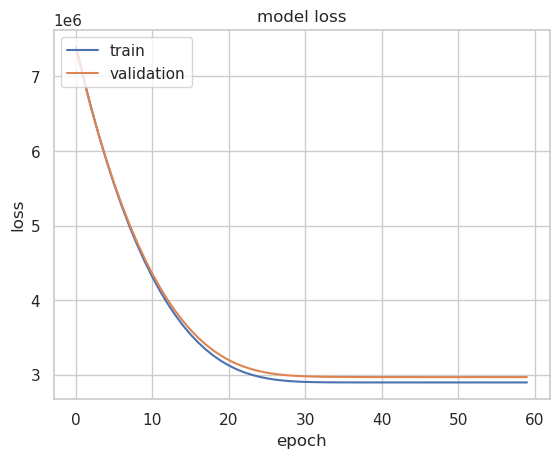

In [698]:
loss_plot(model_history)

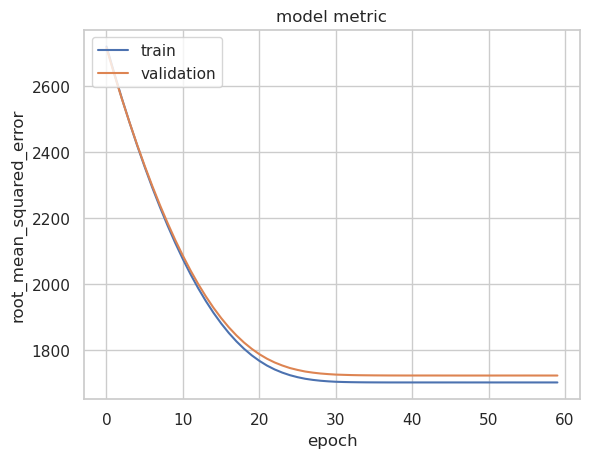

In [699]:
metric_plot(model_history)

In [700]:
prediction = model.predict(test_data)

178/178 [==============================] - 0s 2ms/step


**Meeting: test_data.shape is 5681. Where does the number 178 come from?**

In [701]:
prediction

array([[2174.4563],
       [2174.4563],
       [2174.4563],
       ...,
       [2174.4563],
       [2174.4563],
       [2174.4563]], dtype=float32)

In [643]:
prediction.shape

(5681, 1)

In [702]:
prediction_1d = prediction.reshape(-1,)

In [645]:
prediction_1d

array([1292.197  , 1197.2474 , 1249.0067 , ..., 1387.3574 , 3343.7307 ,
        982.89575], dtype=float32)

In [703]:
submission_data=pd.DataFrame({"Item_Identifier": test_set["Item_Identifier"], 
                              "Outlet_Identifier": test_set["Outlet_Identifier"], 
                             "Item_Outlet_Sales":prediction_1d})

In [704]:
submission_data

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
8523,FDW58,OUT049,2174.456299
8524,FDW14,OUT017,2174.456299
8525,NCN55,OUT010,2174.456299
8526,FDQ58,OUT017,2174.456299
8527,FDY38,OUT027,2174.456299
...,...,...,...
14199,FDB58,OUT046,2174.456299
14200,FDD47,OUT018,2174.456299
14201,NCO17,OUT045,2174.456299
14202,FDJ26,OUT017,2174.456299


In [705]:
submission_data[submission_data["Item_Outlet_Sales"] != 2174.456299]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


In [706]:
submission_data[submission_data["Item_Outlet_Sales"]<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales


## Let us add another hidden layer

In [708]:
model_2 = Sequential()
model_2.add(InputLayer(input_shape=(input_neurons,)))
model_2.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model_2.add(Dense(units=100, activation='relu'))
model_2.add(Dense(units=output_neurons, activation='linear'))
model_2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 500)               17000     
                                                                 
 dense_22 (Dense)            (None, 100)               50100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 67,201
Trainable params: 67,201
Non-trainable params: 0
_________________________________________________________________


In [709]:
model_2.compile(loss= custom_loss,optimizer='Adam',metrics=[RMSE])

In [710]:
model_history_2 = model_2.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=60)

Epoch 1/60
214/214 [==============================] - 2s 6ms/step - loss: 3032186.0000 - root_mean_squared_error: 1737.7045 - val_loss: 2955748.0000 - val_root_mean_squared_error: 1719.2289
Epoch 2/60
214/214 [==============================] - 1s 6ms/step - loss: 2887078.2500 - root_mean_squared_error: 1699.1405 - val_loss: 2952445.5000 - val_root_mean_squared_error: 1718.2682
Epoch 3/60
214/214 [==============================] - 1s 6ms/step - loss: 2874299.5000 - root_mean_squared_error: 1695.3760 - val_loss: 2929127.0000 - val_root_mean_squared_error: 1711.4692
Epoch 4/60
214/214 [==============================] - 1s 5ms/step - loss: 2834467.5000 - root_mean_squared_error: 1683.5876 - val_loss: 2865094.0000 - val_root_mean_squared_error: 1692.6588
Epoch 5/60
214/214 [==============================] - 1s 5ms/step - loss: 2757449.2500 - root_mean_squared_error: 1660.5569 - val_loss: 2786098.5000 - val_root_mean_squared_error: 1669.1610
Epoch 6/60
214/214 [==============================

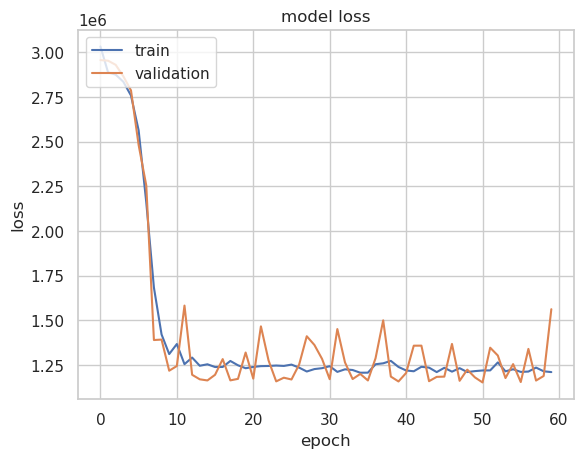

In [711]:
loss_plot(model_history_2)

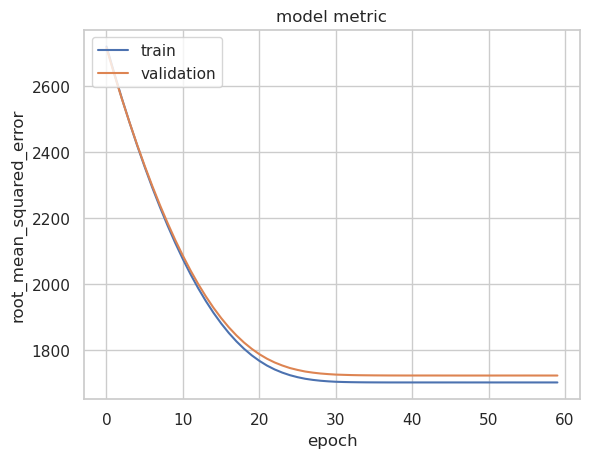

In [712]:
metric_plot(model_history)

In [713]:
prediction_2 = model_2.predict(test_data)

178/178 [==============================] - 1s 3ms/step


In [715]:
prediction_2

array([[2253.7905],
       [2164.8416],
       [1215.3663],
       ...,
       [2371.942 ],
       [4422.9253],
       [1815.2083]], dtype=float32)

In [716]:
prediction_2_1d = prediction_2.reshape(-1,)

In [717]:
def has_negative_values(arr):
    return any(element < 0 for element in arr)

In [718]:
has_negative_values(prediction_2_1d)

False

In [722]:
submission_data=pd.DataFrame({"Item_Identifier": test_set["Item_Identifier"], 
                              "Outlet_Identifier": test_set["Outlet_Identifier"], 
                             "Item_Outlet_Sales":prediction_2_1d})

In [723]:
submission_data.to_csv("submission_data.csv", index=False)

### If I use Item_Identier, Outlet_Identifier, visibility, and mrp only as features and apply model_2, what happens?

In [724]:
train_x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Type_freq', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Item_Identifier_0', 'Item_Identifier_1',
       'Item_Identifier_2', 'Item_Identifier_3', 'Item_Identifier_4',
       'Item_Identifier_5', 'Item_Identifier_6', 'Item_Identifier_7',
       'Item_Identifier_8', 'Item_Identifier_9', 'Item_Identifier_10'],
      dtype='object')

In [726]:
item_id_and_outlet_id = ['Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049', 'Item_Identifier_0', 'Item_Identifier_1',
       'Item_Identifier_2', 'Item_Identifier_3', 'Item_Identifier_4',
       'Item_Identifier_5', 'Item_Identifier_6', 'Item_Identifier_7',
       'Item_Identifier_8', 'Item_Identifier_9', 'Item_Identifier_10','Item_Visibility', 'Item_MRP']

In [727]:
train_x_special = train_x[item_id_and_outlet_id]
test_x_special= test_x[item_id_and_outlet_id]

In [729]:
train_x_special.shape

(6818, 23)

In [730]:
model_3 = Sequential()
model_3.add(InputLayer(input_shape=(train_x_special.shape[1],)))
model_3.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model_3.add(Dense(units=100, activation='relu'))
model_3.add(Dense(units=output_neurons, activation='linear'))
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 500)               12000     
                                                                 
 dense_25 (Dense)            (None, 100)               50100     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 62,201
Trainable params: 62,201
Non-trainable params: 0
_________________________________________________________________


In [731]:
model_3.compile(loss= custom_loss,optimizer='Adam',metrics=[RMSE])

In [732]:
model_history_3 = model_3.fit(train_x_special, train_y, validation_data=(test_x_special, test_y), epochs=60)

Epoch 1/60
214/214 [==============================] - 2s 6ms/step - loss: 4604836.0000 - root_mean_squared_error: 2145.8882 - val_loss: 2092500.1250 - val_root_mean_squared_error: 1446.5476
Epoch 2/60
214/214 [==============================] - 1s 5ms/step - loss: 1801028.7500 - root_mean_squared_error: 1342.0242 - val_loss: 1538688.2500 - val_root_mean_squared_error: 1240.4387
Epoch 3/60
214/214 [==============================] - 1s 6ms/step - loss: 1438954.0000 - root_mean_squared_error: 1199.5641 - val_loss: 1317243.7500 - val_root_mean_squared_error: 1147.7124
Epoch 4/60
214/214 [==============================] - 1s 5ms/step - loss: 1291251.3750 - root_mean_squared_error: 1136.3324 - val_loss: 1232159.2500 - val_root_mean_squared_error: 1110.0267
Epoch 5/60
214/214 [==============================] - 1s 4ms/step - loss: 1230483.7500 - root_mean_squared_error: 1109.2717 - val_loss: 1186926.0000 - val_root_mean_squared_error: 1089.4613
Epoch 6/60
214/214 [==============================

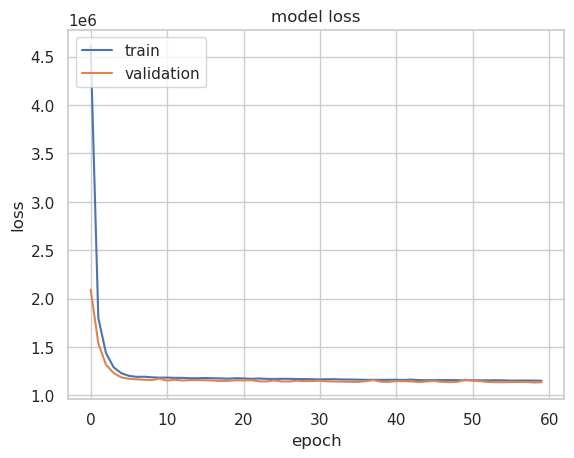

In [733]:
loss_plot(model_history_3)

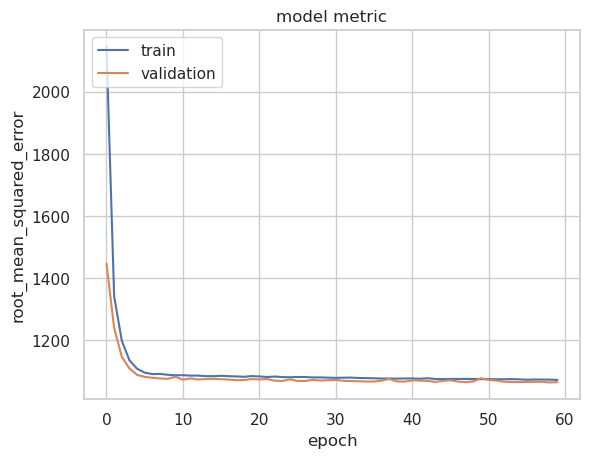

In [734]:
metric_plot(model_history_3)

In [736]:
test_data_special= test_data[item_id_and_outlet_id]

In [737]:
prediction_3 = model_3.predict(test_data_special)

178/178 [==============================] - 1s 3ms/step


In [738]:
prediction_3 = prediction_3.reshape(-1,)

In [739]:
has_negative_values(prediction_3)

False

In [740]:
submission_data_3 =pd.DataFrame({"Item_Identifier": test_set["Item_Identifier"], 
                              "Outlet_Identifier": test_set["Outlet_Identifier"], 
                             "Item_Outlet_Sales":prediction_3})

In [741]:
submission_data_3.to_csv("submission_data_3.csv", index=False)